In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

df= pd.read_excel('aksesbilitas.xlsx')

In [3]:
df.head()

,TransUmum,TransUmum Darat,TransUmum Air/Laut,TransUmum Udara,Kualitas jalan
0,"Ada, Trayek Tetap",Ada,Tidak Ada,Tidak Ada,Rusak Sedang
1,"Ada, Trayek Tetap",Ada,Tidak Ada,Tidak Ada,Baik
2,"Ada, Trayek Tetap",Ada,Tidak Ada,Tidak Ada,Baik
3,"Ada, Tanpa Trayek Tetap",Ada,Tidak Ada,Tidak Ada,Baik
4,"Ada, Trayek Tetap",Tidak Ada,Tidak Ada,Tidak Ada,Baik


In [4]:
df['Kualitas jalan'].value_counts()

Kualitas jalan
Rusak Sedang    490
Baik            430
Rusak Parah     182
Name: count, dtype: int64

In [5]:
x= df.copy()
#Ubah dlu ke angka
x['TransUmum'].replace({'Ada, Trayek Tetap': 3, 'Ada, Tanpa Trayek Tetap':2, 'Tidak Ada Angkutan Umum':1}, inplace= True)
x['TransUmum Darat'].replace({'Ada':1, 'Tidak Ada': 0}, inplace= True)
x['TransUmum Air/Laut'].replace({'Ada':1, 'Tidak Ada': 0}, inplace= True)
x['TransUmum Udara'].replace({'Ada':1, 'Tidak Ada': 0}, inplace= True)
x['Kualitas jalan'].replace({'Rusak Parah':1, 'Rusak Sedang': 2, 'Baik': 3}, inplace= True)
scaler = StandardScaler()
scale_std = scaler.fit_transform(x)
df_scl = pd.DataFrame(scaler.fit_transform(x), columns=df.columns)

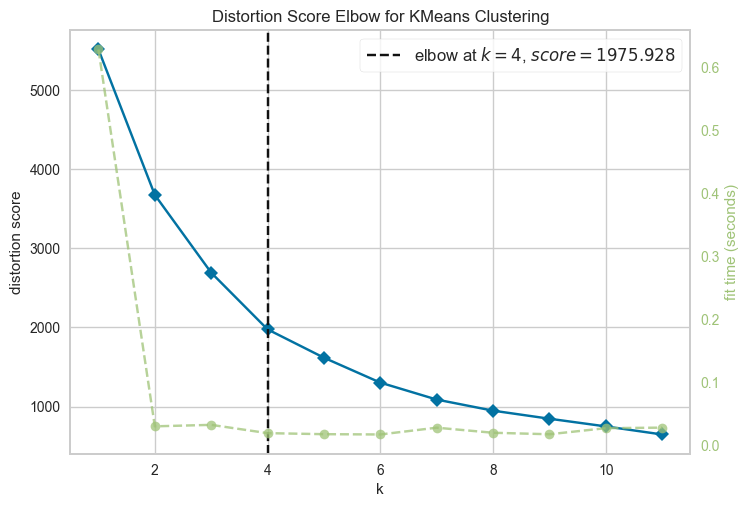

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df_scl)        # Fit the data to the visualizer
visualizer.show()

In [7]:
model = KMeans(
    n_clusters=4, 
    init='k-means++',
    n_init=10, 
    max_iter=100,
    tol=1e-3,
    random_state=42, 
    )
model.fit(df_scl)

data= df.copy()
data['cluster'] = model.labels_
x['cluster'] = model.labels_

In [8]:
result_dict = x.groupby('cluster')[['TransUmum', 'TransUmum Darat', 'TransUmum Air/Laut', 'TransUmum Udara',
       'Kualitas jalan']].mean()
result_dict

,TransUmum,TransUmum Darat,TransUmum Air/Laut,TransUmum Udara,Kualitas jalan
cluster,,,,,
0,1.091743,0.000000,0.000000,0.0,2.030581
1,2.105505,0.587156,1.000000,0.0,2.330275
2,2.638776,0.944898,0.000000,0.0,2.330612
3,1.761194,0.358209,0.253731,1.0,2.059701


In [9]:
map= {0:'buruk parah', 1:'baik', 2: 'buruk', 3:'sedang'}
data['cluster']=data['cluster'].map(map)

In [10]:
data

,TransUmum,TransUmum Darat,TransUmum Air/Laut,TransUmum Udara,Kualitas jalan,cluster
0,"Ada, Trayek Tetap",Ada,Tidak Ada,Tidak Ada,Rusak Sedang,buruk
1,"Ada, Trayek Tetap",Ada,Tidak Ada,Tidak Ada,Baik,buruk
2,"Ada, Trayek Tetap",Ada,Tidak Ada,Tidak Ada,Baik,buruk
3,"Ada, Tanpa Trayek Tetap",Ada,Tidak Ada,Tidak Ada,Baik,buruk
4,"Ada, Trayek Tetap",Tidak Ada,Tidak Ada,Tidak Ada,Baik,buruk
...,...,...,...,...,...,...
1097,Tidak Ada Angkutan Umum,Tidak Ada,Tidak Ada,Ada,Rusak Sedang,sedang
1098,Tidak Ada Angkutan Umum,Tidak Ada,Tidak Ada,Ada,Rusak Sedang,sedang
1099,Tidak Ada Angkutan Umum,Tidak Ada,Tidak Ada,Ada,Rusak Sedang,sedang
1100,Tidak Ada Angkutan Umum,Tidak Ada,Tidak Ada,Ada,Rusak Sedang,sedang


In [11]:
data.to_excel('akses.xlsx')

# Clustering

In [13]:
import pandas as pd
df= pd.read_csv('data filter.csv')

In [14]:
clean= df.drop(['KODE PROV', 'NAMA PROVINSI', 'KODE KAB','KODE KEC','NAMA KABUPATEN', 'KODE DESA'], axis=1)


In [15]:
clean.fillna(method= 'ffill',inplace=True)

In [16]:
obj=clean.select_dtypes(include='object').columns.tolist()
obj

['NAMA KECAMATAN',
 'Sumber Penghasilan Utama Warga',
 'Produk unggulan pangan pertama',
 'Produk unggulan pangan kedua',
 'Produk unggulan tanaman buah pertama',
 'Produk unggulan tanaman Buah kedua',
 'Produk unggulan sayur pertama',
 'Produk unggulan sayur kedua',
 'Produk unggulan obat pertama',
 'Produk unggulan obat kedua',
 'Produk unggulan keseluruhan',
 'Mayoritas_TTG_Perikanan',
 'Mayoritas_TTG_Pertanian',
 'Mayoritas_TTG_Perternakan',
 'BUMDes',
 'Status_Bumdesa',
 'TransUmum',
 'TransUmum Darat',
 'TransUmum Air/Laut',
 'TransUmum Udara',
 'Kualitas jalan']

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [18]:
Cat= clean[obj]

from sklearn.preprocessing import LabelEncoder
Cat = Cat.apply(LabelEncoder().fit_transform)

In [19]:
clean= clean.drop(Cat.columns, axis=1)
clean= pd.concat([clean, Cat], axis=1)

In [20]:
x= clean.copy()
scaler = StandardScaler()
scale_std = scaler.fit_transform(x)
df_scl = pd.DataFrame(scaler.fit_transform(x), columns=clean.columns)

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(scale_std))
pca.explained_variance_

array([1.03682728e+01, 3.09278943e+00, 2.43257731e+00, 2.28662004e+00,
       2.17081955e+00, 1.89778947e+00, 1.70412461e+00, 1.60727023e+00,
       1.57054705e+00, 1.35638209e+00, 1.30896781e+00, 1.24551248e+00,
       1.20517681e+00, 1.12108192e+00, 1.08433961e+00, 1.06490767e+00,
       1.03811839e+00, 1.00857886e+00, 1.00543538e+00, 9.80222071e-01,
       9.75598081e-01, 9.46543185e-01, 9.27717287e-01, 8.90885881e-01,
       8.78690391e-01, 8.45613244e-01, 8.04485775e-01, 7.88717330e-01,
       7.81735938e-01, 7.30324503e-01, 7.00309904e-01, 6.81397180e-01,
       6.21435662e-01, 5.87372670e-01, 5.81582377e-01, 5.50968226e-01,
       4.97233515e-01, 3.91912611e-01, 3.76507854e-01, 3.48322585e-01,
       3.35998293e-01, 2.72609855e-01, 2.51207792e-01, 2.22797537e-01,
       2.01859782e-01, 1.40843561e-01, 9.67440319e-02, 3.15621877e-02,
       1.45314062e-02, 1.34770325e-02, 5.69717879e-03, 2.69776335e-03,
       1.38553490e-03, 1.03937723e-03, 1.65835142e-04, 4.81510407e-32])

In [22]:
len(clean.columns)

56

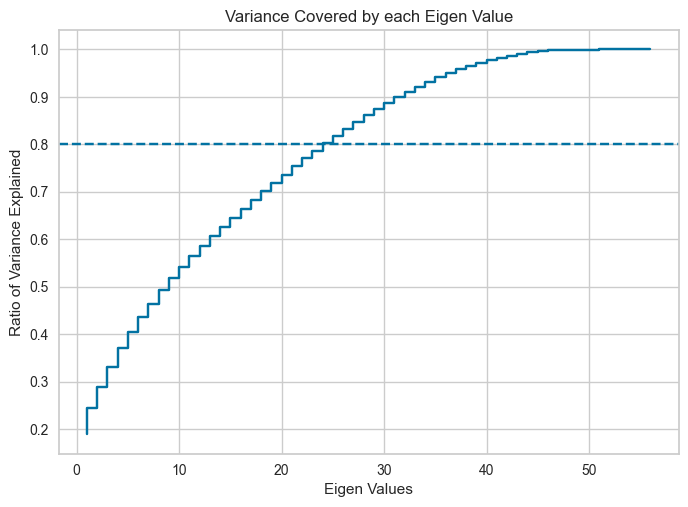

In [23]:
plt.step(list(range(1,57)), np.cumsum(pca.explained_variance_ratio_))
#plt.plot(np.cumsum(pca.explained_variance_ratio_), marker= 'o')
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.axhline( y= 0.8, linestyle= '--')
plt.show()

**25 Eigen Values**

In [24]:
pca = PCA(n_components=25)
pca.fit(scale_std)
df_pca1= pd.DataFrame(pca.transform(df_scl))

In [25]:
df_pca = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df_scl.columns.values,
    index=['component'+' '+str(1+x) for x in range (25)])

df_pca

,Data Tahun,Kuantitas produksi pangan pertama,Kuantitas produk pangan kedua,Kuantitas produksi tanaman buah pertama,Kuantitas produk tanaman buah kedua,Kuantitas produk pertama,Kuantitas produk unggulan sayur kedua,Kuantitas produk unggulan obat pertama,Kuantitas produk unggulan obat kedua,Jlh_alat_mayoritas_Perikanan,...,Mayoritas_TTG_Perikanan,Mayoritas_TTG_Pertanian,Mayoritas_TTG_Perternakan,BUMDes,Status_Bumdesa,TransUmum,TransUmum Darat,TransUmum Air/Laut,TransUmum Udara,Kualitas jalan
component 1,-0.0,-0.0007,-0.0009,0.0007,0.0011,0.0026,0.0029,0.0147,0.0110,-0.0050,...,-0.0168,-0.0065,-0.0114,0.0129,0.0090,0.0124,0.0103,0.0061,0.0038,0.0063
component 2,0.0,-0.0003,0.0135,0.0308,0.1288,0.0648,0.1349,0.0932,0.1122,0.0508,...,-0.0078,0.1860,-0.0648,-0.3120,-0.2846,-0.2020,-0.2484,-0.0699,0.0830,-0.0560
component 3,-0.0,0.0034,0.0031,0.0133,0.2719,0.1263,0.2824,0.2595,0.3060,-0.0860,...,-0.0251,0.0672,-0.0161,-0.0764,-0.0447,-0.1188,-0.0958,0.0657,0.0911,-0.0354
component 4,0.0,-0.0005,-0.0078,0.0104,0.3179,0.1024,0.3371,0.2129,0.2926,0.1452,...,-0.0347,-0.1046,-0.1070,0.1609,0.1437,-0.0005,0.0493,0.0521,0.0101,0.0074
component 5,0.0,-0.0248,0.0285,0.0214,0.2052,0.0120,0.1747,0.2171,0.2391,0.0726,...,0.0375,-0.0090,0.0531,0.0952,0.0414,0.2327,0.2822,-0.0705,-0.1947,0.0750
component 6,-0.0,-0.0143,-0.0033,0.1298,0.1004,0.0114,0.0865,0.0235,0.0426,0.0097,...,0.0067,0.0525,0.0559,0.0176,0.0465,0.0406,0.0307,0.0255,-0.0074,-0.0424
component 7,0.0,0.0512,-0.0413,0.0090,0.0242,0.0792,0.0265,-0.0918,-0.0651,0.1369,...,-0.3974,-0.3616,-0.3775,0.2196,0.2616,0.0801,0.1206,0.0219,-0.0892,-0.0137
component 8,-0.0,0.0001,-0.0892,0.0919,0.0447,0.0733,0.0453,-0.0079,0.0091,-0.2138,...,0.2322,0.0353,0.2458,-0.0449,-0.0537,0.4340,0.3874,0.0532,-0.0703,0.1372
component 9,-0.0,-0.0242,0.0301,0.0162,-0.1117,-0.0337,-0.1300,0.0231,-0.0150,0.1182,...,-0.1553,0.1907,0.0051,-0.0060,-0.0467,0.2752,0.2242,0.3364,0.0442,0.2533
component 10,-0.0,-0.0046,0.0426,-0.1652,-0.2549,-0.0985,-0.2137,0.3403,0.1652,-0.1907,...,0.1262,0.0745,0.1887,0.2497,0.2909,-0.1737,-0.1538,0.0701,-0.0702,0.0075


In [26]:
pca_scores = pca.transform(df_scl)

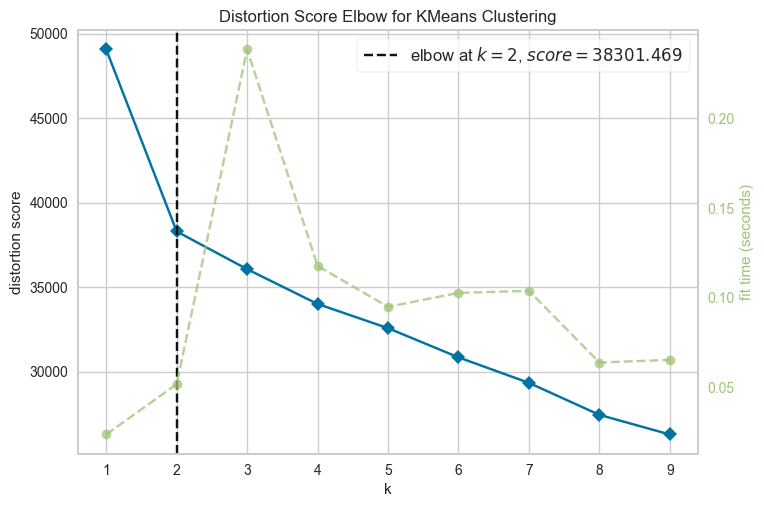

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(pca_scores)    
visualizer.show()

In [28]:
kmax=8
sil= []
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(pca_scores)
    labels = kmeans.labels_
    sil.append(silhouette_score(pca_scores, labels, metric = 'euclidean'))
sil

[0.9336574081364994,
 0.10137161916347043,
 0.0984988799777363,
 0.0905124415623285,
 0.09909307635914746,
 0.14677853972807223,
 0.10508690862806774]

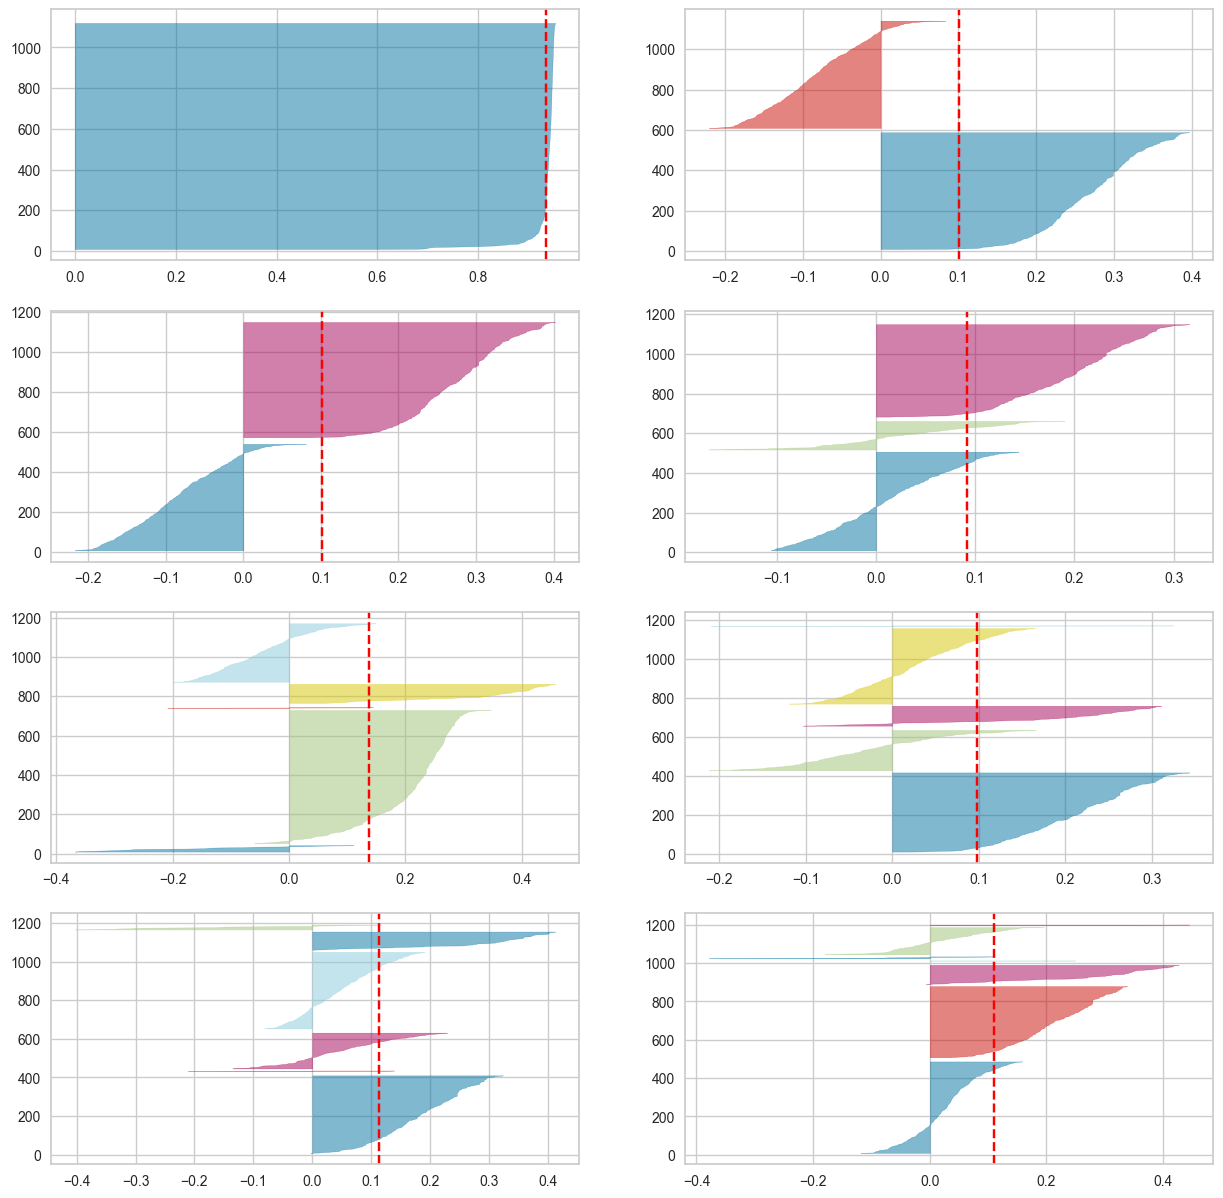

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,15))

for i in [2, 3, 4, 5, 6, 7,8,9]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=8, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_scores)

In [30]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(df_pca1)

KMeans(n_clusters=2, random_state=42)

In [31]:
df2=df.copy()
#df2.dropna(inplace=True)
df2['K-means PCA'] = kmeans.labels_

In [ ]:
df_segm_pca = pd.concat([df.reset_index(drop=True), df_pca1], axis=1)
df_segm_pca.columns.values[-25:] = ['component '+str(i+1) for i in range(25)]
df_segm_pca['K-means PCA'] = kmeans.labels_
df_segm_pca

,KODE PROV,NAMA PROVINSI,KODE KAB,NAMA KABUPATEN,KODE KEC,NAMA KECAMATAN,KODE DESA,Data Tahun,Sumber Penghasilan Utama Warga,Produk unggulan pangan pertama,...,component 17,component 18,component 19,component 20,component 21,component 22,component 23,component 24,component 25,K-means PCA
0,A,NUSA TENGGARA TIMUR,AA1,NGADA,AA101,GOLEWA,AA1012002,2023.0,"Pertanian, (termasuk Perkebunan, Peternakan, P...",Talas,...,1.229139,-1.089251,1.140127,1.541880,0.004571,0.066846,-1.070892,-0.127387,-1.017528,0
1,A,NUSA TENGGARA TIMUR,AA1,NGADA,AA101,GOLEWA,AA1012010,2023.0,"Pertanian, (termasuk Perkebunan, Peternakan, P...",Jagung,...,0.414580,0.464769,-0.384571,-0.003687,-0.169049,-0.181366,0.802931,0.855556,0.004466,0
2,A,NUSA TENGGARA TIMUR,AA1,NGADA,AA101,GOLEWA,AA1012011,2023.0,"Pertanian, (termasuk Perkebunan, Peternakan, P...",Jagung,...,0.861353,-0.734947,0.335707,1.060791,0.744250,0.321333,0.632961,0.081230,-0.595529,0
3,A,NUSA TENGGARA TIMUR,AA1,NGADA,AA101,GOLEWA,AA1012018,2023.0,"Pertanian, (termasuk Perkebunan, Peternakan, P...",Jagung,...,0.117120,-0.518670,0.064869,0.218675,0.457173,0.428638,0.386962,0.590478,-0.243060,0
4,A,NUSA TENGGARA TIMUR,AA1,NGADA,AA101,GOLEWA,AA1012025,2023.0,"Pertanian, (termasuk Perkebunan, Peternakan, P...",Talas,...,-1.180443,0.101508,0.446316,0.049022,-0.807439,-0.648601,-0.730326,1.601719,-0.575250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.193217,-1.436089,0.156298,-0.252090,-0.830648,-0.528570,0.947373,-0.139242,0.072308,0
1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.193217,-1.436089,0.156298,-0.252090,-0.830648,-0.528570,0.947373,-0.139242,0.072308,0
1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.193217,-1.436089,0.156298,-0.252090,-0.830648,-0.528570,0.947373,-0.139242,0.072308,0
1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.193217,-1.436089,0.156298,-0.252090,-0.830648,-0.528570,0.947373,-0.139242,0.072308,0


In [32]:
df3=clean.copy()
df3.dropna(inplace=True)
df3['K-means PCA'] = kmeans.labels_

In [33]:
df2[['K-means PCA', 'BUMDes']]

,K-means PCA,BUMDes
0,0,Ada
1,0,Ada
2,0,Ada
3,0,Ada
4,0,Ada
...,...,...
1107,0,Tidak Ada
1108,0,Tidak Ada
1109,0,Tidak Ada
1110,0,Tidak Ada


In [34]:
df3[['Kualitas jalan', 'K-means PCA']]

,Kualitas jalan,K-means PCA
0,2,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1107,2,0
1108,2,0
1109,2,0
1110,2,0


In [35]:
group=df3.groupby('K-means PCA').mean()
group.style.highlight_max(color = 'yellow', axis = 0)

,Data Tahun,Kuantitas produksi pangan pertama,Kuantitas produk pangan kedua,Kuantitas produksi tanaman buah pertama,Kuantitas produk tanaman buah kedua,Kuantitas produk pertama,Kuantitas produk unggulan sayur kedua,Kuantitas produk unggulan obat pertama,Kuantitas produk unggulan obat kedua,Jlh_alat_mayoritas_Perikanan,Jlh_alat_mayoritas_Pertanian,Jlh_alat_mayoritas_Perternakan,UMikroKecil Pariwisata,UMikroKecil Perikanan,UMikroKecil Pertanian,UMikroKecil Peternakan,UMikroKecil Lainnya,Total UMikroKecil,UMenengah,Total Pangan Unggulan Pertama Masuk Pasar Domestik,Total Pangan Unggulan Kedua Masuk Pasar Domestik,Total Buah Unggulan Pertama Masuk Pasar Domestik,Total Buah Unggulan Kedua Masuk Pasar Domestik,Total Sayur Unggulan Pertama Masuk Pasar Domestik,Total Sayur Unggulan Kedua Masuk Pasar Domestik,Total Tanaman Obat Unggulan Pertama Masuk Pasar Domestik,Total Tanaman Obat Unggulan Kedua Masuk Pasar Domestik,Total Pangan Unggulan Pertama Masuk Pasar Ekspor,Total Pangan Unggulan Kedua Masuk Pasar Ekspor,Total Buah Unggulan Pertama Masuk Pasar Ekspor,Total Buah Unggulan Kedua Masuk Pasar Ekspor,Total Sayur Unggulan Pertama Masuk Pasar Ekspor,Total Sayur Unggulan Kedua Masuk Pasar Ekspor,Total Tanaman Obat Unggulan Pertama Masuk Pasar Ekspor,Total Tanaman Obat Unggulan Kedua Masuk Pasar Ekspor,NAMA KECAMATAN,Sumber Penghasilan Utama Warga,Produk unggulan pangan pertama,Produk unggulan pangan kedua,Produk unggulan tanaman buah pertama,Produk unggulan tanaman Buah kedua,Produk unggulan sayur pertama,Produk unggulan sayur kedua,Produk unggulan obat pertama,Produk unggulan obat kedua,Produk unggulan keseluruhan,Mayoritas_TTG_Perikanan,Mayoritas_TTG_Pertanian,Mayoritas_TTG_Perternakan,BUMDes,Status_Bumdesa,TransUmum,TransUmum Darat,TransUmum Air/Laut,TransUmum Udara,Kualitas jalan
K-means PCA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2023.000000,27650.186634,98.773147,97.406160,4.874071,17.300245,4.632225,10.818389,3.635937,3.763276,8.622862,3.005401,0.209721,1.148515,1.183618,1.007201,1.338434,8.842484,1.087309,227.153240,6.732405,8.363276,2926.108245,1.975095,0.550523,1.407870,0.390289,3.900450,0.673978,1.763789,0.356625,0.447444,0.400720,0.786319,0.600000,92.108011,3.911791,9.077408,7.352835,20.895590,19.029703,4.623762,3.541854,11.047705,9.045905,2.243924,6.471647,6.948695,5.930693,0.410441,0.602160,1.111611,0.446445,0.788479,0.930693,1.062106
1,2023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,14.000000,4.000000,9.000000,7.000000,25.000000,21.000000,0.000000,0.000000,12.000000,10.000000,2.000000,4.000000,5.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000


In [36]:
df2['K-means PCA'].replace({0:'Prioritas 2', 1:'Prioritas 1'}, inplace=True)

In [37]:
df2.shape

(1112, 63)

In [38]:
df2.to_excel('prioritas.xlsx')

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">DBSCAN</div></center>

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

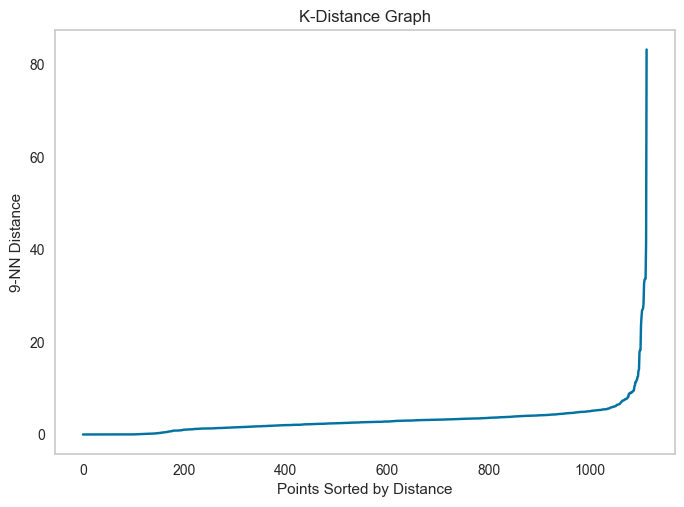

In [83]:
knn = NearestNeighbors(n_neighbors = 2)
model = knn.fit(df_scl)
distances, indices = knn.kneighbors(df_scl)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('9-NN Distance')
plt.title('K-Distance Graph');

In [84]:
db = DBSCAN(eps = 7, min_samples = 25).fit(df_scl)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


n_clusters_ = len(set(labels)) - (4 if -4 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)


Number of Clusters :  2
Number of Outliers :  63


In [65]:
df_segm_pca['class'] = labels

In [66]:
df_segm_pca['class'].value_counts()

class
 0    1049
-1      63
Name: count, dtype: int64

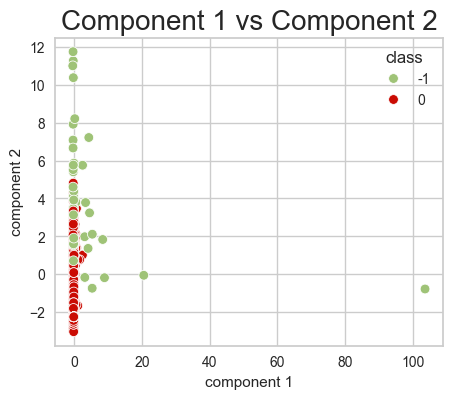

In [68]:
plt.figure(figsize=(5, 4))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 2'],
    hue=df_segm_pca['class'],
    palette=['g','r','orange', 'black']
)

plt.title('Component 1 vs Component 2', fontsize=20)
plt.show()

In [70]:
metode_kmeans= silhouette_score(pca_scores, kmeans.labels_)
metode_dbscan= silhouette_score(pca_scores, labels)

In [71]:
metode=['metode kmeans', 'metode dbscan']
silhouette=[metode_kmeans,metode_dbscan]
dict = {'metode': metode, 
                'silhouette_score':silhouette} 

data_frame=pd.DataFrame(dict).sort_values(by='silhouette_score', ascending=False).reset_index().drop('index',axis=1)
data_frame['silhouette_score'] = data_frame['silhouette_score'].round(decimals = 3)
data_frame

,metode,silhouette_score
0,metode kmeans,0.934
1,metode dbscan,0.616


In [76]:
df_pca2=df_pca1.copy()
df_pca2['class']= labels

In [77]:
group= df_pca2.groupby('class').mean()
group.style.highlight_max(color = 'yellow', axis = 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
class,,,,,,,,,,,,,,,,,,,,,,,,,
-1,2.644844,3.326624,-0.656694,2.250947,1.134199,1.090614,0.526648,-0.064424,0.472988,-0.199829,-0.911158,-0.489902,0.060722,0.016720,0.165473,0.324403,-0.443597,0.001472,0.409590,0.147213,-0.444519,0.585455,0.256407,0.019993,0.192230
0,-0.158842,-0.199788,0.039439,-0.135186,-0.068117,-0.065499,-0.031629,0.003869,-0.028406,0.012001,0.054722,0.029422,-0.003647,-0.001004,-0.009938,-0.019483,0.026641,-0.000088,-0.024599,-0.008841,0.026697,-0.035161,-0.015399,-0.001201,-0.011545
